import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'trainable_last_large_beta'
image_title = '$\\|\\beta\\|_2^2$: 16, Trainable: last layer'
plotly_title = r'$\|\beta\|_2^2$: 16, Trainable: last layer'
exp = 'summary/' + filename + '.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue

#dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

epochs_list = np.unique(df['epochs'])
color_list = 'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    ax[2].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')

fig.suptitle(image_title)
plt.legend(epochs_list, title='epochs')
plt.savefig('pdf_plots/' + filename + '.pdf')

epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'orange']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    line = go.scatter.Line(color = color)
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    error_y = dict(type = 'data', array = std, color = color, width = 0, thickness = 0.9)
    marker = dict(size = 3)
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line,  error_y = error_y, marker = marker, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker,  name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log', title = 'nodes')
fig.update_layout(height = 400, width = 1000, legend_title_text='epochs', title = plotly_title)

fig.show()
plotly.offline.plot(fig, filename = 'html_plots/' + filename + '.html')

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
with open('summary/mse4.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
df.dtypes
#df1 = df.loc[df['epochs'] == 5000]

nodes              int64
SNR              float64
train-mse        float64
train-mse-bal    float64
majority-mse     float64
minority-mse     float64
trainable         object
setup             object
dtype: object

In [3]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['setup', 'SNR',  'nodes'], as_index=False).agg(agg_dict)
result.loc[result['setup']=='diff-core']

setup   SNR  nodes train-mse                 majority-mse            \
                                mean       std count         mean       std   
0   diff-core   0.1     10  8.073217  2.341973   500     1.384170  0.770153   
1   diff-core   0.1     20  8.153782  2.369216   500     1.527837  0.891467   
2   diff-core   0.1     40  8.102685  2.353959   500     1.443275  0.831862   
3   diff-core   0.1     80  8.094199  2.351179   500     1.422941  0.797232   
4   diff-core   0.1    160  9.132952  2.832610   500     2.531454  1.620378   
5   diff-core   0.1    320  9.099536  2.817233   500     2.534622  1.730147   
6   diff-core   0.1    640  9.079428  2.730749   500     2.560292  1.635287   
7   diff-core   0.1   1280  8.867105  2.730098   500     2.332466  1.445054   
8   diff-core   0.1   2560  8.657955  2.587776   500     2.294808  1.457951   
9   diff-core   0.1   5120  8.590235  2.570089   500     2.254376  1.361235   
10  diff-core   0.1  10240  8.625083  2.594161   500     2.342789  1.440060   
11  diff-core   0.1  20480  8.652311  2.580049   500     2.378429  1.404720   
12  diff-core   0.1  40960  8.683430  2.620378   500     2.424692  1.523711   
13  diff-core   0.1  81920  8.651411  2.623224   500     2.375953  1.440885   
14  diff-core   1.0     10  0.091675  0.023127   500     0.024708  0.007382   
15  diff-core   1.0     20  0.092817  0.023377   500     0.026603  0.008733   
16  diff-core   1.0     40  0.092031  0.023241   500     0.025375  0.007940   
17  diff-core   1.0     80  0.092037  0.023272   500     0.025323  0.008203   
18  diff-core   1.0    160  0.103978  0.028388   500     0.038148  0.016541   
19  diff-core   1.0    320  0.103341  0.027942   500     0.037464  0.016192   
20  diff-core   1.0    640  0.102564  0.027317   500     0.037305  0.016237   
21  diff-core   1.0   1280  0.101069  0.026587   500     0.036545  0.014245   
22  diff-core   1.0   2560  0.098584  0.026364   500     0.034631  0.013759   
23  diff-core   1.0   5120  0.097136  0.025248   500     0.033838  0.012879   
24  diff-core   1.0  10240  0.098058  0.026056   500     0.035311  0.014868   
25  diff-core   1.0  20480  0.098646  0.025818   500     0.036273  0.014950   
26  diff-core   1.0  40960  0.098373  0.025786   500     0.036056  0.014963   
27  diff-core   1.0  81920  0.097978  0.025862   500     0.035218  0.015197   
28  diff-core  10.0     10  0.010350  0.001065   500     0.010680  0.000599   
29  diff-core  10.0     20  0.010678  0.001156   500     0.011090  0.000810   
30  diff-core  10.0     40  0.010453  0.001091   500     0.010785  0.000669   
31  diff-core  10.0     80  0.010425  0.001092   500     0.010766  0.000653   
32  diff-core  10.0    160  0.011991  0.001637   500     0.012380  0.001494   
33  diff-core  10.0    320  0.011416  0.001365   500     0.011766  0.001156   
34  diff-core  10.0    640  0.011487  0.001515   500     0.011859  0.001238   
35  diff-core  10.0   1280  0.011325  0.001393   500     0.011724  0.001126   
36  diff-core  10.0   2560  0.011174  0.001283   500     0.011540  0.000955   
37  diff-core  10.0   5120  0.011058  0.001214   500     0.011457  0.000933   
38  diff-core  10.0  10240  0.011100  0.001242   500     0.011480  0.000929   
39  diff-core  10.0  20480  0.011179  0.001288   500     0.011570  0.001037   
40  diff-core  10.0  40960  0.011116  0.001319   500     0.011521  0.001130   
41  diff-core  10.0  81920  0.011122  0.001355   500     0.011514  0.001060   

         minority-mse                  
   count         mean       std count  
0    500    82.230811  6.403338   500  
1    500    82.092190  6.646977   500  
2    500    82.212413  6.502820   500  
3    500    82.133403  6.501240   500  
4    500    83.296845  8.544544   500  
5    500    82.488298  8.605065   500  
6    500    82.433354  8.841066   500  
7    500    82.053369  7.708999   500  
8    500    80.854665  7.793250   500  
9    500    80.610151  7.768289   500  
10   500    80.372932  8.048775   500  
11   500   

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
betas = [1, 5, 10]
for i, beta in enumerate(betas):
    result1 = result.loc[result['beta-norm']==beta]
    nodes, mean_minor, std_minor = result1['nodes'],\
         result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
    ax[i].errorbar(nodes, mean_minor, std_minor, color = 'k', linestyle = '-', marker = '*')
    ax[i].errorbar(nodes, mean_major, std_major, color = 'orange', linestyle = '-', marker = '+')
    ax[i].errorbar(nodes, mean_tr, std_tr, color = 'g', linestyle = '-', marker = 'x')
    #ax[0].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].title.set_text(f'SNR={beta**2}')
lines = [Line2D([0], [0], color='k', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+'), \
        Line2D([0], [0], color='g', linestyle='-', marker='x')]  

plt.legend(lines, ['Minority', 'Majority', 'Balanced Train'], title='MSE')
#plt.title('$\\text{SNR}=\\frac{\\|\\beta\\|_2^2}{\\|\\delta\\|_2^2}$')
plt.savefig('pdf_plots/plot.pdf')

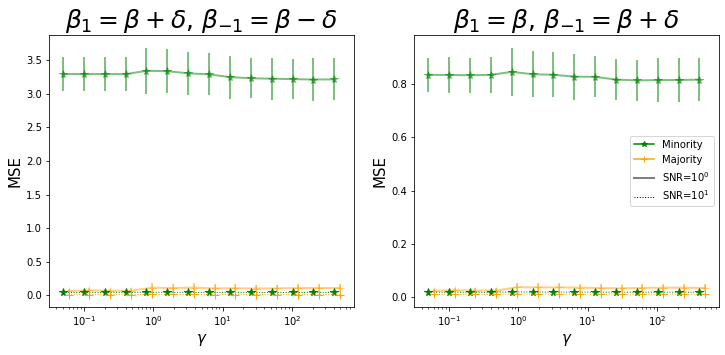

In [13]:
SNRs = [1, 10]
ltys = ['-', ':']
lws = [2, 1]
alphas = [0.5, 1]
add_on = 4 ** np.array(range(6))
#setups = ['same-core-over-envs', 'different-core-over-envs']
setups = ['same-core', 'diff-core']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharex=True)
for s, (setup, name) in enumerate(zip(setups, names)):
    result_setup = result.loc[result['setup']==setup]
    for i, (SNR, lty, lw, alpha) in enumerate(zip(SNRs, ltys, lws, alphas)):
        result1 = result_setup.loc[result['SNR']==SNR]
        nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

        mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
        mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
        ax[s].errorbar(nodes/200, mean_minor, std_minor, color = 'g', linestyle = lty,\
             marker = '*', markersize = 8, lw = lw, alpha = alpha)
        ax[s].errorbar(nodes * (1.2)/200, mean_major, std_major, color = 'orange', linestyle = lty,\
         marker = '+', markersize = 8, lw = lw, alpha = alpha)
        #ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         #markersize = 8, lw = lw, alpha = alpha)
        #ax[s].set_yscale('log')
        ax[s].set_xscale('log')
        ax[s].set_xlabel('$\\gamma$', fontsize = 15)
        ax[s].set_ylabel('MSE', fontsize = 15)
        ax[s].set_title(name, fontsize = 25)
        #ax[s].set_ylim(0, 20)
        
    
lines = [Line2D([0], [0], color='g', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+')]#, \
        #Line2D([0], [0], color='g', linestyle='-', marker='x')\
        #]  
labels = ['Minority', 'Majority']#, 'Balanced Train']
for i, (beta, lty, lw, alpha) in enumerate(zip(betas, ltys, lws, alphas)):
    lines.append(Line2D([0], [0], color='k', linestyle=lty, lw = lw, alpha = alpha))
    j = i-1
    labels.append(f'SNR=$10^{i}$')
plt.legend(lines, labels, fontsize = 10)
plt.savefig('pdf_plots/plot.pdf')

import numpy as np
n, d = 200, 10
np.random.seed(1)
gammas = np.logspace(0.05, 1.5, num = 10)
nodes_list = np.rint(n * gammas).astype('int')


def sample_from_sphere(n, d):
    x = np.random.normal(size = (n, d))
    x = (x.T/np.linalg.norm(x, axis = 1)).T
    return x

for nodes in nodes_list:
    w = sample_from_sphere(d, nodes)
    np.save(f'weights/w_{d}_{nodes}.npy', w)